**Diabetes Prediction using Random Forest Algorithm**

The objective of this analysis is to explore various health-related variables and their relationships to accurately categorize diabetes. These variables encompass factors like age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This thorough examination aims to not only uncover patterns and trends in diabetes risk but also establish a strong foundation for future research. In particular, it can serve as a basis for investigating the intricate interactions among these variables and their impact on the occurrence and progression of diabetes. This knowledge is pivotal for enhancing patient care and outcomes in the ever-important realm of healthcare.

In [ ]:
# Import Neccessary libraries
import pandas as pd
import numpy as np

# Import Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Import Model libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

**Input the data**

In [32]:
df = pd.read_csv(r"C:\Users\vishy\OneDrive\Desktop\diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


**1) Exploratory Data Analysis - Data Quality**

**i) Describe the data**

In [34]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


**ii) Searching for Missing values**

In [35]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

**iii) Handling Duplicates**

In [38]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [39]:
df = df.drop_duplicates()

**iv) Uniqueness**

In [41]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [42]:
# Remove Unneccessary value [0.00195%]
df = df[df['gender'] != 'Other']

In [44]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,41.796617,0.077615,0.040810,27.321450,5.532633,138.218001,0.088237
std,22.463329,0.267567,0.197851,6.767811,1.073225,40.911190,0.283640
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


**2) Exploratory Data Analysis - Univariate Analysis**

**i) Histogram for age**

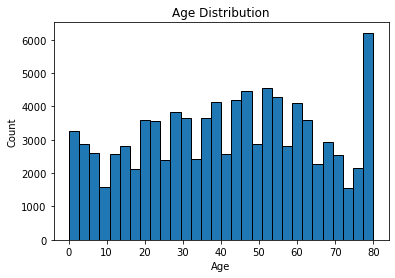

In [45]:
# Histogram for age
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**ii) Bar plot for gender**

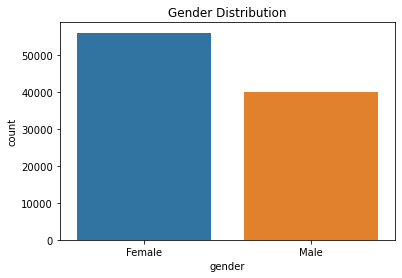

In [46]:
# Bar plot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

**iii) Distribution plot for BMI**

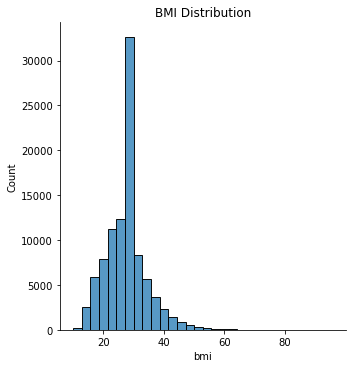

In [47]:
# Distribution plot for BMI
sns.displot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

**iv) Count plots for binary variables**

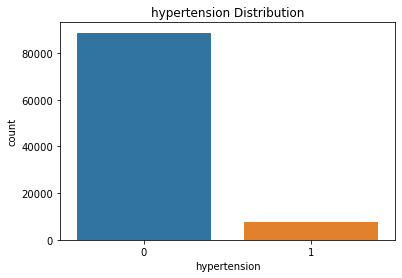

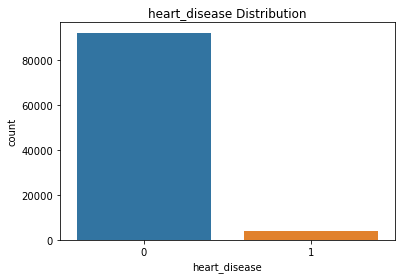

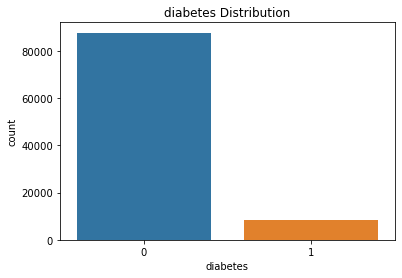

In [48]:
# Count plots for binary variables
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

**v) Count plot for smoking history**

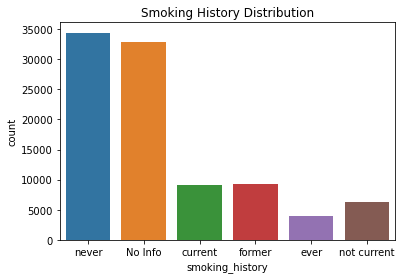

In [49]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

**3) Exploratory Data Analysis - Bivariate Analysis**

**i) Boxplot BMI vs Diabetes classification**

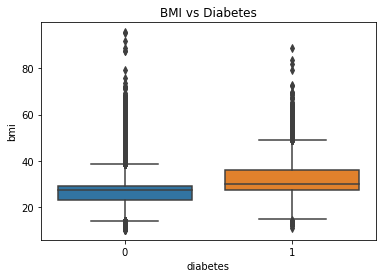

In [50]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

**ii) Boxplot Age vs Diabetes classification**

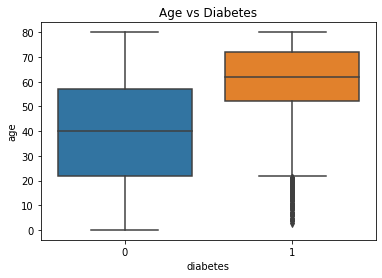

In [51]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

**iii) Count plot of gender vs diabetes**

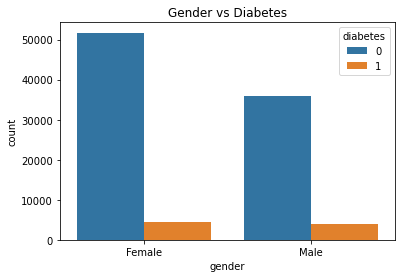

In [52]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

**iv) Boxplot HbA1c level vs Diabetes classification**

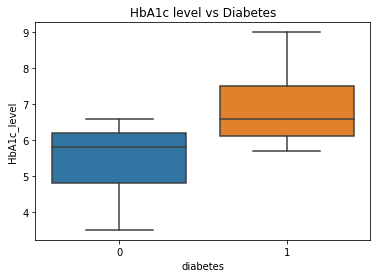

In [53]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()

**v) Boxplot blood glucose level vs Diabetes classification**

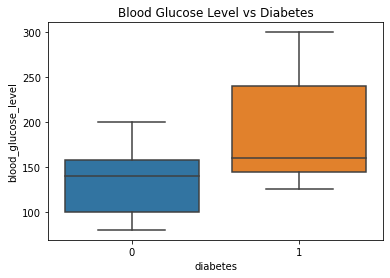

In [55]:
# Boxplot blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

**vi) Pair plot for numeric features**

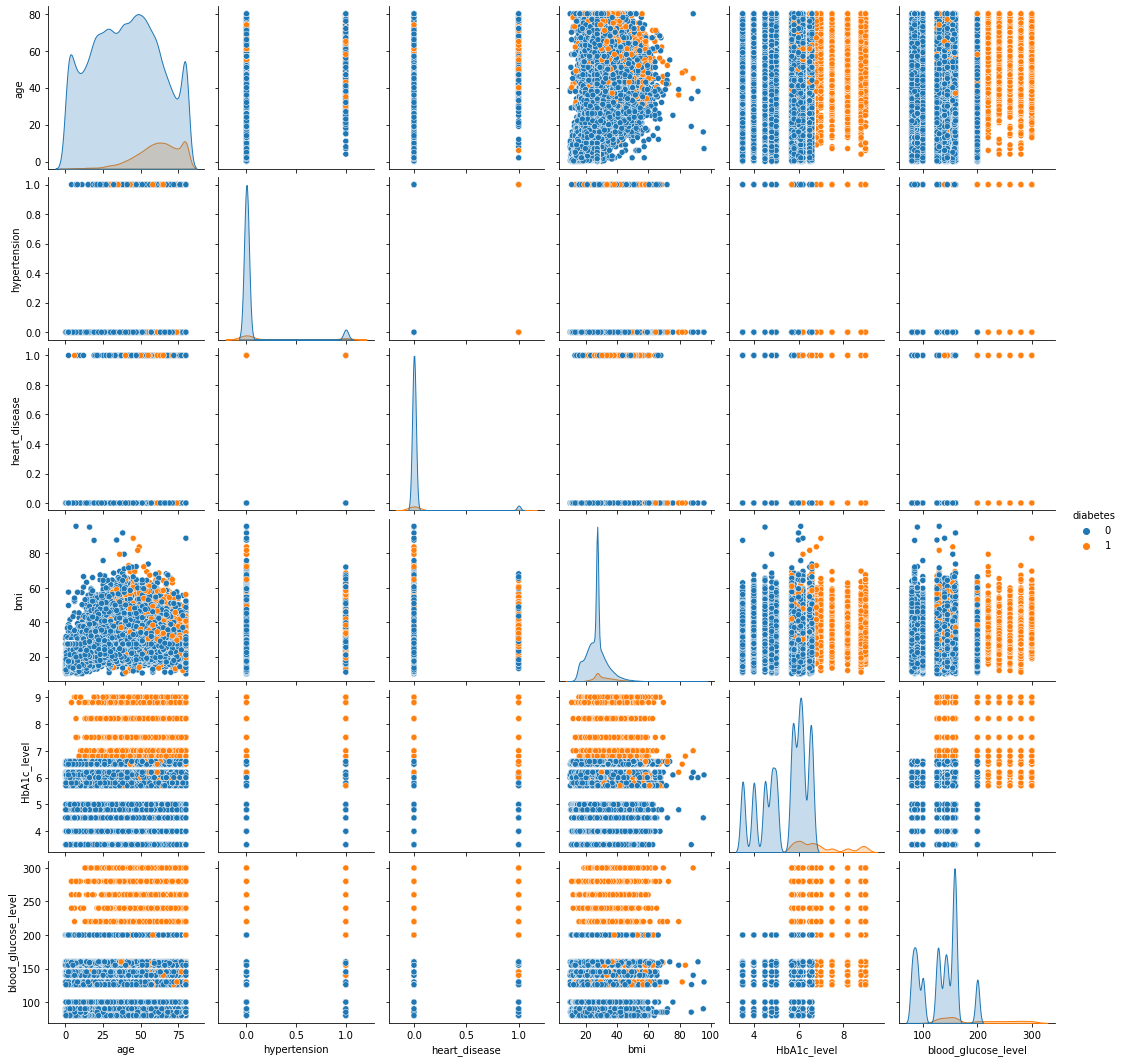

In [56]:
# Pair plot for numeric features
sns.pairplot(df, hue='diabetes')
plt.show()

**4) Exploratory Data Analysis - Multivariate Analysis**

**i) Scatterplot Age vs BMI colored by Diabetes classification**

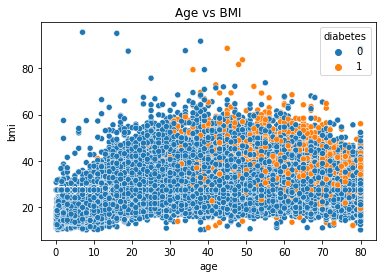

In [57]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

**ii) Violin plot of BMI against diabetes classification split by gender**

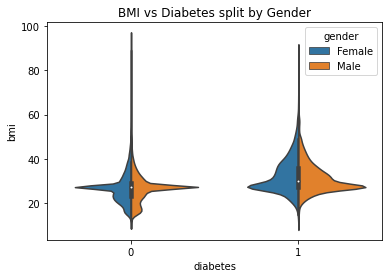

In [58]:
# Violin plot of BMI against diabetes classification split by gender
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

**iii) Interaction between gender, BMI and diabetes**

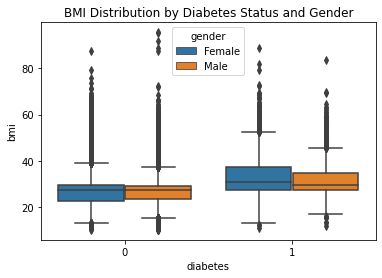

In [59]:
#Interaction between gender, BMI and diabetes
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

**iv) Interaction between gender, Age and diabetes**

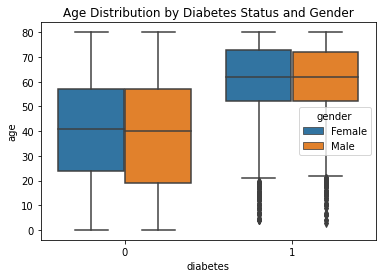

In [60]:
# Interaction between gender, Age and diabetes
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

**5) Correlation - Data Preparation**

In [61]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

non-smoker     67276
past_smoker    19655
current         9197
Name: smoking_history, dtype: int64


**6) Correlation - One Hot Encoding**

In [62]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

**7) Correlation Matrix**

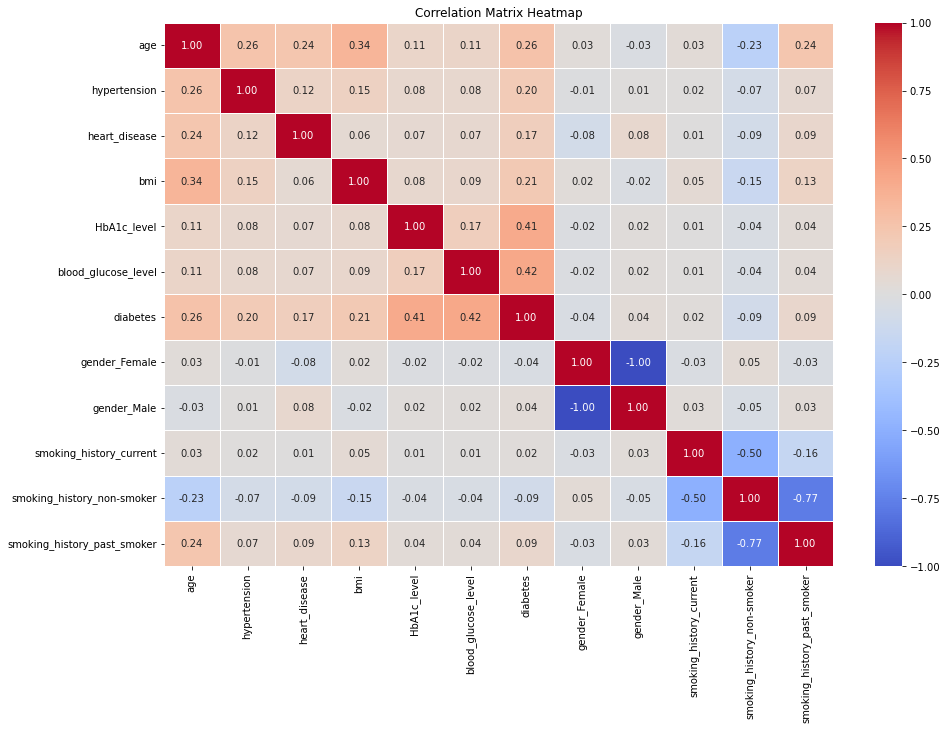

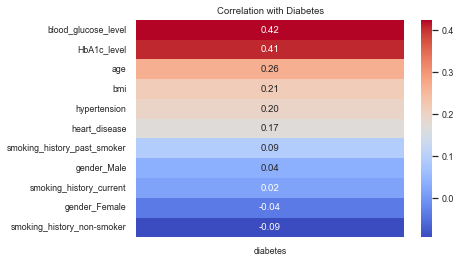

In [63]:
# Compute the correlation matrix
correlation_matrix = data.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

**8) Addressing Class Imbalance**

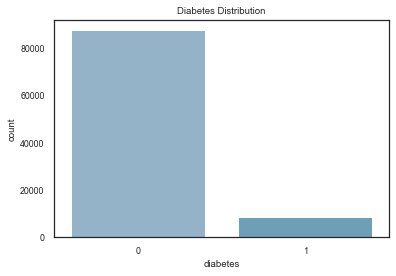

In [64]:
# Count plot for the 'diabetes' variable
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()

In [67]:
# Define resampling
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

**9) Preprocessing : Scaler**

In [70]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

# Split data into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [71]:
# Create a pipeline that preprocesses the data, resamples data, and then trains a classifier
clf = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', RandomForestClassifier())])

**10) Model Building and Hyperparameter Tuning**

In [72]:
# Define the hyperparameters and the values we want to test
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [73]:
# Create Grid Search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}


The outcome reveals the optimal parameters for our Random Forest model that were discovered during the hyperparameter tuning process:

max_depth of 10: This signifies that the maximum depth of the trees within the forest is set to 10 levels. Imposing this depth constraint is valuable for mitigating overfitting. This outcome suggests that a moderately complex tree is the most suitable choice for our dataset. Excessive complexity (deeper trees) might capture noise, while insufficient complexity (shallower trees) might fail to capture the underlying data structure.

min_samples_leaf of 2: This implies that each leaf node (the terminal node of a decision tree where predictions are generated) must encompass a minimum of two samples. Similar to max_depth, this parameter serves as a means to curb overfitting. By stipulating that a prediction requires at least two samples, the model avoids fitting to outliers or noise present in the training data.

min_samples_split of 2: This clarifies that a node must possess at least two samples to be eligible for division (leading to the creation of two child nodes). Comparable to the min_samples_leaf parameter, this contributes to controlling overfitting.

n_estimators of 50: This denotes the quantity of decision trees contained within the forest. The Random Forest algorithm functions by averaging the predictions from numerous decision trees to generate a final prediction, thus aiding in diminishing overfitting and variability. In this instance, employing a forest comprising 50 trees seems to yield the most favorable performance.

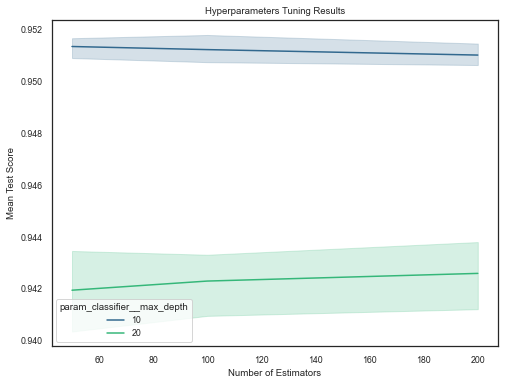

In [74]:
# Convert GridSearchCV results to a DataFrame and plot
results_df = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='viridis')
plt.title('Hyperparameters Tuning Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

**11) Confusion Matrix**

Model Accuracy:  0.9488193071881826
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17525
           1       0.68      0.80      0.73      1701

    accuracy                           0.95     19226
   macro avg       0.83      0.88      0.85     19226
weighted avg       0.95      0.95      0.95     19226



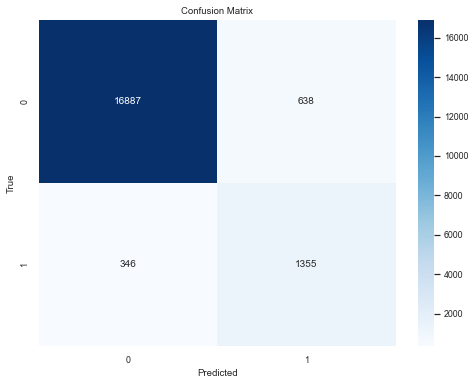

In [75]:
# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Our trained Random Forest Model achieved an accuracy of around 95%. This indicates that the model correctly classified around 95% of all cases in the test set.

Looking deeper into the classification metrics, let's dissect the performance for each class (0 and 1) separately:

A | Class 0 (Non-diabetes): 
The model has a high precision (0.98) for class 0, meaning that among all instances where the model predicted non-diabetes, 98% were indeed non-diabetes.
The recall for class 0 is also high (0.96). This means that our model correctly identified 96% of all actual non-diabetes cases in the dataset.
B | Class 1 (Diabetes): 
The precision for class 1 is lower around (0.65), which indicates that when the model predicted diabetes, it was correct around 65% of the time.
However, the recall is reasonably high around (0.80). This means that our model was able to capture around 80% of all actual diabetes cases.
The F1 score, a harmonic mean of precision and recall, is around 0.97 for class 0 and around 0.72 for class 1. The weighted average F1 score is around 0.94, in line with the overall accuracy.

This discrepancy in performance between classes is likely due to the imbalance in the original dataset. Class 0 (Non-diabetes) is the majority class and has more examples for the model to learn from.

**12) Feature Importances**

                        Feature  Importance
2                   HbA1c_level    0.457423
3           blood_glucose_level    0.310769
0                           age    0.113935
1                           BMI    0.062830
4                  hypertension    0.029929
5                 heart_disease    0.014576
10  smoking_history_past_smoker    0.003571
9    smoking_history_non-smoker    0.003194
7                   gender_Male    0.001566
6                 gender_Female    0.001475
8       smoking_history_current    0.000734


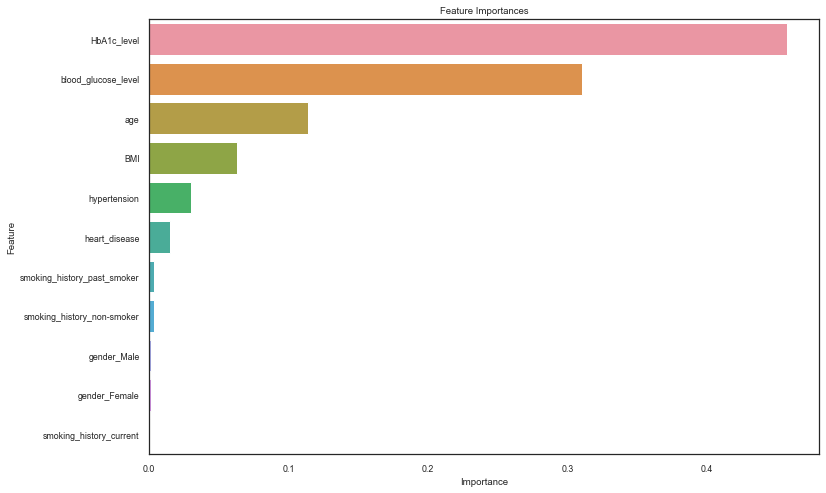

In [76]:
# After fitting the model, we input feature names
onehot_columns = list(grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))

# Then we add the numeric feature names
feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns

# And now let's get the feature importances
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_

# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()


The feature importance results provide insight into which features are most influential in predicting diabetes using our Random Forest Model. The importance of a feature is calculated based on how much the tree nodes that use that feature reduce impurity across all trees in the forest.

Here are the key findings from the feature importance results:

HbA1c_level is the most important feature with an importance of 0.44. HbA1c is a measure of the average levels of blood glucose over the past 2 to 3 months, so it's not surprising that it's a significant predictor of diabetes.

The blood_glucose_level the second most important feature with an importance of 0.32. This aligns with medical knowledge, as blood glucose levels are directly used to diagnose diabetes.

Age the third most important feature with an importance of 0.14. It's well known that the risk of type 2 diabetes increases as you get older.

BMI comes fourth in terms of importance at 0.06. Body Mass Index is a key risk factor for diabetes, and its role is well documented in medical literature.

Other features like hypertension and heart_disease show some importance (0.02 and 0.01, respectively), indicating that these health conditions might have some relevance in predicting diabetes, though not as significant as the top four factors.

Smoking history ('smoking_history_non-smoker', 'smoking_history_past_smoker', 'smoking_history_current') and gender ('gender_Female', 'gender_Male') are shown to have minimal or zero importance in our model. This could be due to a number of reasons including that these factors may not be as influential in the development of diabetes or it could be a result of how the data was collected or structured.